In [1]:
%matplotlib inline


# OT for image color adaptation with mapping estimation


OT for domain adaptation with image color adaptation [6] with mapping
estimation [8].

[6] Ferradans, S., Papadakis, N., Peyre, G., & Aujol, J. F. (2014). Regularized
    discrete optimal transport. SIAM Journal on Imaging Sciences, 7(3),
    1853-1882.
[8] M. Perrot, N. Courty, R. Flamary, A. Habrard, "Mapping estimation for
    discrete optimal transport", Neural Information Processing Systems (NIPS),
    2016.




In [2]:
# Authors: Remi Flamary <remi.flamary@unice.fr>
#          Stanislas Chambon <stan.chambon@gmail.com>
#
# License: MIT License

import numpy as np
from scipy import ndimage
import matplotlib.pylab as pl
import ot

r = np.random.RandomState(42)


def im2mat(I):
    """Converts and image to matrix (one pixel per line)"""
    return I.reshape((I.shape[0] * I.shape[1], I.shape[2]))


def mat2im(X, shape):
    """Converts back a matrix to an image"""
    return X.reshape(shape)


def minmax(I):
    return np.clip(I, 0, 1)

Generate data
-------------



In [3]:
# Loading images
I1 = ndimage.imread('../data/ocean_day.jpg').astype(np.float64) / 256
I2 = ndimage.imread('../data/ocean_sunset.jpg').astype(np.float64) / 256


X1 = im2mat(I1)
X2 = im2mat(I2)

# training samples
nb = 1000
idx1 = r.randint(X1.shape[0], size=(nb,))
idx2 = r.randint(X2.shape[0], size=(nb,))

Xs = X1[idx1, :]
Xt = X2[idx2, :]

Domain adaptation for pixel distribution transfer
-------------------------------------------------



In [4]:
# EMDTransport
ot_emd = ot.da.EMDTransport()
ot_emd.fit(Xs=Xs, Xt=Xt)
transp_Xs_emd = ot_emd.transform(Xs=X1)
Image_emd = minmax(mat2im(transp_Xs_emd, I1.shape))

# SinkhornTransport
ot_sinkhorn = ot.da.SinkhornTransport(reg_e=1e-1)
ot_sinkhorn.fit(Xs=Xs, Xt=Xt)
transp_Xs_sinkhorn = ot_emd.transform(Xs=X1)
Image_sinkhorn = minmax(mat2im(transp_Xs_sinkhorn, I1.shape))

ot_mapping_linear = ot.da.MappingTransport(
    mu=1e0, eta=1e-8, bias=True, max_iter=20, verbose=True)
ot_mapping_linear.fit(Xs=Xs, Xt=Xt)

X1tl = ot_mapping_linear.transform(Xs=X1)
Image_mapping_linear = minmax(mat2im(X1tl, I1.shape))

ot_mapping_gaussian = ot.da.MappingTransport(
    mu=1e0, eta=1e-2, sigma=1, bias=False, max_iter=10, verbose=True)
ot_mapping_gaussian.fit(Xs=Xs, Xt=Xt)

X1tn = ot_mapping_gaussian.transform(Xs=X1)  # use the estimated mapping
Image_mapping_gaussian = minmax(mat2im(X1tn, I1.shape))

It.  |Loss        |Delta loss
--------------------------------
    0|3.680514e+02|0.000000e+00
    1|3.592355e+02|-2.395298e-02
    2|3.590579e+02|-4.943115e-04
    3|3.589661e+02|-2.556530e-04
    4|3.589094e+02|-1.577896e-04
    5|3.588705e+02|-1.084239e-04
    6|3.588421e+02|-7.914757e-05
    7|3.588206e+02|-6.013011e-05
    8|3.588034e+02|-4.783086e-05
    9|3.587895e+02|-3.866500e-05
   10|3.587781e+02|-3.194454e-05
   11|3.587684e+02|-2.697250e-05
   12|3.587601e+02|-2.296505e-05
   13|3.587530e+02|-1.975975e-05
   14|3.587468e+02|-1.733678e-05
   15|3.587413e+02|-1.535580e-05
   16|3.587365e+02|-1.350581e-05
   17|3.587321e+02|-1.209997e-05
   18|3.587282e+02|-1.086348e-05
   19|3.587268e+02|-4.096770e-06
It.  |Loss        |Delta loss
--------------------------------
    0|3.784725e+02|0.000000e+00
    1|3.646380e+02|-3.655332e-02
    2|3.642858e+02|-9.660434e-04
    3|3.641516e+02|-3.683776e-04
    4|3.640785e+02|-2.008220e-04
    5|3.640320e+02|-1.276966e-04
    6|3.639999e+02

Plot original images
--------------------



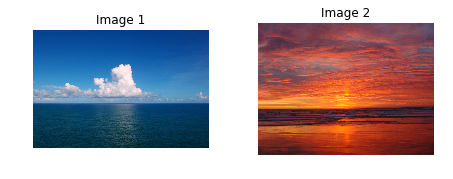

In [5]:
pl.figure(1, figsize=(6.4, 3))
pl.subplot(1, 2, 1)
pl.imshow(I1)
pl.axis('off')
pl.title('Image 1')

pl.subplot(1, 2, 2)
pl.imshow(I2)
pl.axis('off')
pl.title('Image 2')
pl.tight_layout()

Plot pixel values distribution
------------------------------



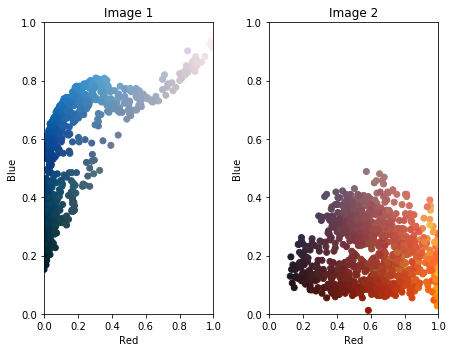

In [6]:
pl.figure(2, figsize=(6.4, 5))

pl.subplot(1, 2, 1)
pl.scatter(Xs[:, 0], Xs[:, 2], c=Xs)
pl.axis([0, 1, 0, 1])
pl.xlabel('Red')
pl.ylabel('Blue')
pl.title('Image 1')

pl.subplot(1, 2, 2)
pl.scatter(Xt[:, 0], Xt[:, 2], c=Xt)
pl.axis([0, 1, 0, 1])
pl.xlabel('Red')
pl.ylabel('Blue')
pl.title('Image 2')
pl.tight_layout()

Plot transformed images
-----------------------



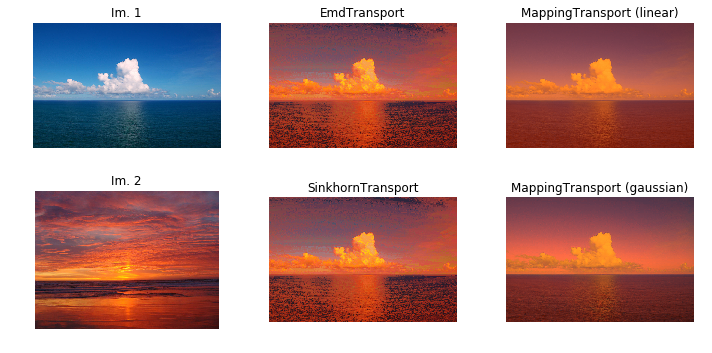

In [7]:
pl.figure(2, figsize=(10, 5))

pl.subplot(2, 3, 1)
pl.imshow(I1)
pl.axis('off')
pl.title('Im. 1')

pl.subplot(2, 3, 4)
pl.imshow(I2)
pl.axis('off')
pl.title('Im. 2')

pl.subplot(2, 3, 2)
pl.imshow(Image_emd)
pl.axis('off')
pl.title('EmdTransport')

pl.subplot(2, 3, 5)
pl.imshow(Image_sinkhorn)
pl.axis('off')
pl.title('SinkhornTransport')

pl.subplot(2, 3, 3)
pl.imshow(Image_mapping_linear)
pl.axis('off')
pl.title('MappingTransport (linear)')

pl.subplot(2, 3, 6)
pl.imshow(Image_mapping_gaussian)
pl.axis('off')
pl.title('MappingTransport (gaussian)')
pl.tight_layout()

pl.show()